In [1]:
from numpy import array

def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

      Unnamed: 0                  TIMESTAMP    IN_BYTES   OUT_BYTES   IN_PKTS  \
0              0  2019-09-04 00:00:00+00:00    0.000000    0.000000    0.0000   
1              1  2019-09-04 00:05:00+00:00    0.000000    0.000000    0.0000   
2              2  2019-09-04 00:10:00+00:00    0.000000    0.000000    0.0000   
3              3  2019-09-04 00:15:00+00:00    0.000000    0.000000    0.0000   
4              4  2019-09-04 00:20:00+00:00    0.000000    0.000000    0.0000   
...          ...                        ...         ...         ...       ...   
2155        2155  2019-09-11 11:35:00+00:00  561.651505  213.150122  117.1903   
2156        2156  2019-09-11 11:40:00+00:00  423.701934  288.081520  127.1112   
2157        2157  2019-09-11 11:45:00+00:00  493.721616  227.437666  119.4574   
2158        2158  2019-09-11 11:50:00+00:00  537.946905  144.053531   90.2356   
2159        2159  2019-09-11 11:55:00+00:00   54.219492   86.630876   29.6338   

      OUT_PKTS  COUNTS  
0 

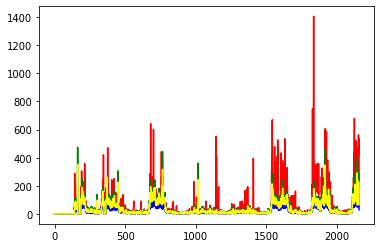

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./../data/sensor-cmc-corp.csv')
data['IN_BYTES'] = data['IN_BYTES']/10**6
data['OUT_BYTES'] = data['OUT_BYTES']/10**7
data['IN_PKTS'] = data['IN_PKTS']/10**4
data['OUT_PKTS'] = data['OUT_PKTS']/10**4

print(data)
plt.plot(data['IN_BYTES'], color='red')
plt.plot(data['IN_PKTS'], color='blue')
plt.plot(data['OUT_BYTES'], color='green')
plt.plot(data['OUT_PKTS'], color='yellow')
# plt.plot(data['COUNTS'], color='black')
plt.show()

In [4]:
data_seq = data['IN_BYTES']
n_step_in = 144
n_step_out = 12
X, y = split_sequence(data_seq, n_step_in, n_step_out)
print(X.shape)
print(X)

(2005, 144)
[[  0.         0.         0.       ...   0.       288.717841 170.326572]
 [  0.         0.         0.       ... 288.717841 170.326572 100.02435 ]
 [  0.         0.         0.       ... 170.326572 100.02435   94.81369 ]
 ...
 [ 13.514847  26.603627  53.391727 ... 336.476458 280.895981 339.732909]
 [ 26.603627  53.391727  11.285537 ... 280.895981 339.732909 466.928791]
 [ 53.391727  11.285537  25.913581 ... 339.732909 466.928791 200.248964]]


In [5]:
n_feature = 1
X = X.reshape(X.shape[0], X.shape[1], n_feature)
y = y.reshape((y.shape[0], y.shape[1], n_feature))
print(X.shape)
# print(y)

(2005, 144, 1)


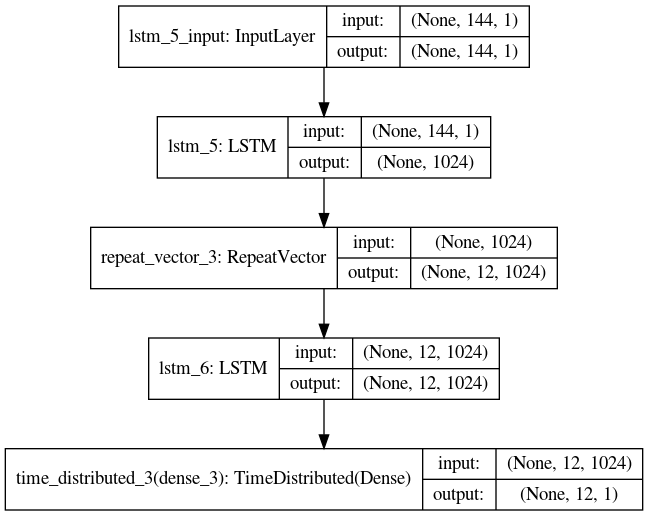

In [3]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

n_step_in = 144
n_step_out = 12
n_feature = 1
model = Sequential()
model.add(LSTM(1024, activation='tanh', input_shape=(n_step_in, n_feature)))
model.add(RepeatVector(n_step_out))
model.add(LSTM(1024, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
model.fit(X, y, epochs=200)

Epoch 1/200
2000/2000 [==============================] - 27s 14ms/step - loss: 1305.0163
Epoch 2/200
2000/2000 [==============================] - 26s 13ms/step - loss: 750.5010
Epoch 3/200
2000/2000 [==============================] - 27s 14ms/step - loss: 697.8303
Epoch 4/200
2000/2000 [==============================] - 26s 13ms/step - loss: 691.2055
Epoch 5/200
2000/2000 [==============================] - 27s 13ms/step - loss: 660.0864
Epoch 6/200
2000/2000 [==============================] - 26s 13ms/step - loss: 643.2390
Epoch 7/200
2000/2000 [==============================] - 27s 13ms/step - loss: 637.0222
Epoch 8/200
2000/2000 [==============================] - 26s 13ms/step - loss: 626.0533
Epoch 9/200
2000/2000 [==============================] - 27s 13ms/step - loss: 619.5425
Epoch 10/200
2000/2000 [==============================] - 27s 13ms/step - loss: 629.8204
Epoch 11/200
2000/2000 [==============================] - 26s 13ms/step - loss: 642.2587
Epoch 12/200
2000/2000 [=====

2000/2000 [==============================] - 26s 13ms/step - loss: 328.1456
Epoch 94/200
2000/2000 [==============================] - 26s 13ms/step - loss: 319.3321
Epoch 95/200
2000/2000 [==============================] - 27s 13ms/step - loss: 313.2900
Epoch 96/200
2000/2000 [==============================] - 26s 13ms/step - loss: 317.6898
Epoch 97/200
2000/2000 [==============================] - 27s 14ms/step - loss: 304.8743
Epoch 98/200
2000/2000 [==============================] - 26s 13ms/step - loss: 298.4159
Epoch 99/200
2000/2000 [==============================] - 27s 13ms/step - loss: 297.7305
Epoch 100/200
2000/2000 [==============================] - 25s 12ms/step - loss: 288.9791
Epoch 101/200
2000/2000 [==============================] - 25s 13ms/step - loss: 315.9974
Epoch 102/200
2000/2000 [==============================] - 27s 13ms/step - loss: 308.1404
Epoch 103/200
2000/2000 [==============================] - 25s 13ms/step - loss: 306.9877
Epoch 104/200
2000/2000 [=====

Save all the model (architecture, weight, optimize states)

In [ ]:
from keras.models import load_model

model.save('ae_lstm_int_pkts.h5')

In [6]:
X_test = array(data_seq[-144:])
X_curr = X_test.reshape(1, n_step_in, n_feature)
print(X_curr)

[[[ 20.262976]
  [ 16.246969]
  [ 25.099116]
  [  7.567113]
  [  9.995046]
  [  7.682866]
  [  9.047745]
  [ 11.39842 ]
  [  6.433208]
  [  6.639067]
  [  6.335977]
  [  6.368213]
  [ 18.466253]
  [  7.151751]
  [  6.153452]
  [  6.492608]
  [  6.253983]
  [  6.311493]
  [  7.615203]
  [  7.339535]
  [  6.101198]
  [ 10.560659]
  [ 16.191517]
  [  6.945299]
  [  7.077012]
  [  6.481568]
  [  8.061158]
  [ 23.083637]
  [  7.750113]
  [  7.677635]
  [  5.397928]
  [  5.537024]
  [  4.943475]
  [  6.073617]
  [  5.723019]
  [  5.837208]
  [  6.09291 ]
  [  7.094359]
  [  5.897068]
  [  5.335955]
  [ 27.76244 ]
  [  9.904972]
  [  6.512879]
  [  7.659991]
  [  5.277648]
  [  6.51951 ]
  [  5.725551]
  [  4.709727]
  [  8.55193 ]
  [  5.08445 ]
  [  9.041763]
  [  5.369894]
  [ 25.095111]
  [  4.908823]
  [  5.156752]
  [  4.468982]
  [  6.324585]
  [  6.138638]
  [  8.320318]
  [ 29.644796]
  [  7.67528 ]
  [  7.258689]
  [  7.645283]
  [  6.792383]
  [  9.694337]
  [  6.793882]
  [ 31.342

12
[187.69308471679688, 67.4776611328125, 59.861087799072266, 68.89310455322266, 73.564208984375, 73.15815734863281, 87.78057861328125, 91.54729461669922, 72.2364730834961, 59.52000427246094, 58.874813079833984, 59.3081169128418]


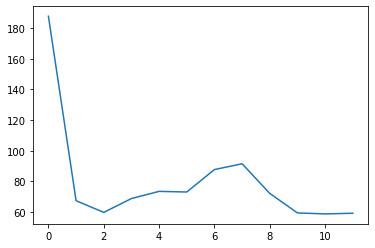

In [10]:
import numpy as np
y_hat = model.predict(X_curr)
print(y_hat.shape[1])
print(y_hat.reshape(y_hat.shape[1]).tolist())
plt.plot(y_hat.reshape(12))
plt.show()

In [9]:
from keras.models import load_model

model = load_model('ae_lstm_in_bytes.h5')

In [38]:
model.total_loss

<tf.Tensor 'loss_1/mul:0' shape=() dtype=float32>

In [27]:
model.layers[3].output_shape

(None, 12, 1)

In [12]:
oracle_seq = list()
X_test = X_test.tolist()
for i in range(24):
    y_hat = model.predict(X_curr)
    oracle_seq += y_hat.reshape(n_step_out).tolist()
    X_test = X_test + oracle_seq[-12:]
    X_curr = np.array(X_test[-144:]).reshape(1, n_step_in, n_feature)

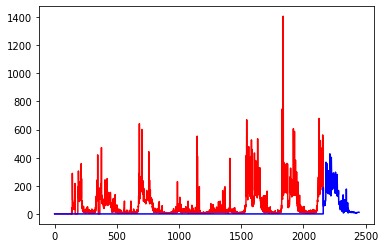

In [13]:
plt.plot(array(data_seq).tolist(),'red')
next_oracle = [0]*len(data_seq) + oracle_seq
plt.plot(next_oracle,'blue')
plt.show()

In [17]:
model.fit(X, y, epochs=200)

Epoch 1/200
1972/1972 [==============================] - 25s 13ms/step - loss: 496.3751
Epoch 2/200
1972/1972 [==============================] - 27s 13ms/step - loss: 394.9006
Epoch 3/200
1972/1972 [==============================] - 26s 13ms/step - loss: 376.4642
Epoch 4/200
1972/1972 [==============================] - 26s 13ms/step - loss: 379.7170
Epoch 5/200
1972/1972 [==============================] - 26s 13ms/step - loss: 368.7798
Epoch 6/200
1972/1972 [==============================] - 25s 13ms/step - loss: 419.3590
Epoch 7/200
1972/1972 [==============================] - 27s 14ms/step - loss: 440.8009
Epoch 8/200
1972/1972 [==============================] - 24s 12ms/step - loss: 400.1298
Epoch 9/200
1972/1972 [==============================] - 25s 13ms/step - loss: 368.7957
Epoch 10/200
1972/1972 [==============================] - 24s 12ms/step - loss: 352.4253
Epoch 11/200
1972/1972 [==============================] - 27s 14ms/step - loss: 359.7636
Epoch 12/200
1972/1972 [======

1972/1972 [==============================] - 27s 13ms/step - loss: 39.9240
Epoch 185/200
1972/1972 [==============================] - 26s 13ms/step - loss: 36.8781
Epoch 186/200
1972/1972 [==============================] - 28s 14ms/step - loss: 36.1290
Epoch 187/200
1972/1972 [==============================] - 26s 13ms/step - loss: 36.8633
Epoch 188/200
1972/1972 [==============================] - 28s 14ms/step - loss: 38.8423
Epoch 189/200
1972/1972 [==============================] - 25s 13ms/step - loss: 37.7912
Epoch 190/200
1972/1972 [==============================] - 23s 11ms/step - loss: 75.4969
Epoch 191/200
1972/1972 [==============================] - 26s 13ms/step - loss: 186.0065
Epoch 192/200
1972/1972 [==============================] - 26s 13ms/step - loss: 211.8388
Epoch 193/200
1972/1972 [==============================] - 25s 13ms/step - loss: 198.4438
Epoch 194/200
1972/1972 [==============================] - 25s 13ms/step - loss: 231.3397
Epoch 195/200
1972/1972 [======